In [1]:
# 셀 1: 기본 설정 + 데이터 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
sns.set(font_scale=1.1)

path = "/content/drive/MyDrive/Colab Notebooks/cohort_ver151_129_183_merged_ordered.csv"
df = pd.read_csv(path)

print("===== Shape =====")
print(df.shape)

print("\n===== 미리보기 (상위 5행) =====")
display(df.head())


===== Shape =====
(40817, 38)

===== 미리보기 (상위 5행) =====


,subject_id,hadm_id,age,gender,race,arrival_transport,cci_score,hfrs_score,door_to_ecg,door_to_trop,...,run_max_trop,trop_trend,pci_status,current_heart_rate,current_mean_bp,timestamp,target_mortality,target_next_evt,target_time_to_next,target_remain_los
0,13647833,20006266,40,1,ASIAN - SOUTH EAST ASIAN,1,0,0.0,-1.0,626.0,...,0,0,0,81.0,77.555556,2179-04-27 10:54,0,3,5.081404,9.764743
1,13647833,20006266,40,1,ASIAN - SOUTH EAST ASIAN,1,0,0.0,-1.0,626.0,...,0,0,0,81.0,77.555556,2179-04-27 13:34,0,6,0.000000,9.755509
2,13647833,20006266,40,1,ASIAN - SOUTH EAST ASIAN,1,0,0.0,-1.0,626.0,...,0,0,0,81.0,77.555556,2179-04-27 13:34,0,7,0.000000,9.755509
3,13647833,20006266,40,1,ASIAN - SOUTH EAST ASIAN,1,0,0.0,-1.0,626.0,...,0,0,0,81.0,77.555556,2179-04-27 13:34,0,2,0.693147,9.755509
4,13647833,20006266,40,1,ASIAN - SOUTH EAST ASIAN,1,0,0.0,-1.0,626.0,...,0,0,0,81.0,77.555556,2179-04-27 13:35,0,3,0.000000,9.755451


In [2]:
# 셀 2: 컬럼, 타입, 결측 확인

print("===== 컬럼 목록 =====")
print(list(df.columns))

print("\n===== dtypes =====")
print(df.dtypes)

print("\n===== 결측치 개수 =====")
na = df.isna().sum()
display(na[na > 0] if na.sum() > 0 else na)


===== 컬럼 목록 =====
['subject_id', 'hadm_id', 'age', 'gender', 'race', 'arrival_transport', 'cci_score', 'hfrs_score', 'door_to_ecg', 'door_to_trop', 'door_to_anti', 'door_to_pci', 'door_to_ecg_missing_flag', 'door_to_trop_missing_flag', 'door_to_anti_missing_flag', 'door_to_pci_missing_flag', 'prefix_len', 'current_event_id', 'time_since_start_min', 'time_since_ed', 'time_since_last', 'is_night', 'cum_ecg_cnt', 'cum_stemi_cnt', 'cum_trop_cnt', 'stemi_flag', 'trop_pos_flag', 'last_trop', 'run_max_trop', 'trop_trend', 'pci_status', 'current_heart_rate', 'current_mean_bp', 'timestamp', 'target_mortality', 'target_next_evt', 'target_time_to_next', 'target_remain_los']

===== dtypes =====
subject_id                     int64
hadm_id                        int64
age                            int64
gender                         int64
race                          object
arrival_transport              int64
cci_score                      int64
hfrs_score                   float64
door_to_ecg 

,0
subject_id,0
hadm_id,0
age,0
gender,0
race,0
arrival_transport,0
cci_score,0
hfrs_score,0
door_to_ecg,0
door_to_trop,0


In [3]:
# 셀 3: 숫자형 / 범주형 분리 + 숫자형 요약

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print("=== Numeric Columns ===")
print(num_cols)

print("\n=== Categorical Columns ===")
print(cat_cols)

print("\n=== 숫자형 변수 기술통계 ===")
display(df[num_cols].describe().T)


=== Numeric Columns ===
['subject_id', 'hadm_id', 'age', 'gender', 'arrival_transport', 'cci_score', 'hfrs_score', 'door_to_ecg', 'door_to_trop', 'door_to_anti', 'door_to_pci', 'door_to_ecg_missing_flag', 'door_to_trop_missing_flag', 'door_to_anti_missing_flag', 'door_to_pci_missing_flag', 'prefix_len', 'current_event_id', 'time_since_start_min', 'time_since_ed', 'time_since_last', 'is_night', 'cum_ecg_cnt', 'cum_stemi_cnt', 'cum_trop_cnt', 'stemi_flag', 'trop_pos_flag', 'last_trop', 'run_max_trop', 'trop_trend', 'pci_status', 'current_heart_rate', 'current_mean_bp', 'target_mortality', 'target_next_evt', 'target_time_to_next', 'target_remain_los']

=== Categorical Columns ===
['race', 'timestamp']

=== 숫자형 변수 기술통계 ===


,count,mean,std,min,25%,50%,75%,max
subject_id,40817.0,1.501444e+07,2.824566e+06,10000764.0,1.264815e+07,1.497701e+07,1.734891e+07,1.999678e+07
hadm_id,40817.0,2.485263e+07,2.844193e+06,20006266.0,2.253814e+07,2.465513e+07,2.729324e+07,2.999742e+07
age,40817.0,6.490254e+01,1.596334e+01,18.0,5.600000e+01,6.600000e+01,7.700000e+01,9.100000e+01
gender,40817.0,6.551192e-01,4.753352e-01,0.0,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
arrival_transport,40817.0,1.353064e+00,8.082380e-01,0.0,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00
cci_score,40817.0,5.620452e-01,1.195624e+00,0.0,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+01
hfrs_score,40817.0,2.728836e+00,4.991811e+00,0.0,0.000000e+00,0.000000e+00,3.500000e+00,3.510000e+01
door_to_ecg,40817.0,9.885947e+00,4.316395e+01,-1.0,-1.000000e+00,-1.000000e+00,5.000000e+00,3.964800e+02
door_to_trop,40817.0,5.385871e+02,7.143282e+02,-1.0,4.200000e+01,4.170000e+02,6.590000e+02,4.598720e+03
door_to_anti,40817.0,5.611698e+02,5.723122e+02,-1.0,2.350000e+02,4.350000e+02,7.090000e+02,3.477320e+03


/tmp/ipython-input-3479659470.py:9: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3479659470.py:9: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


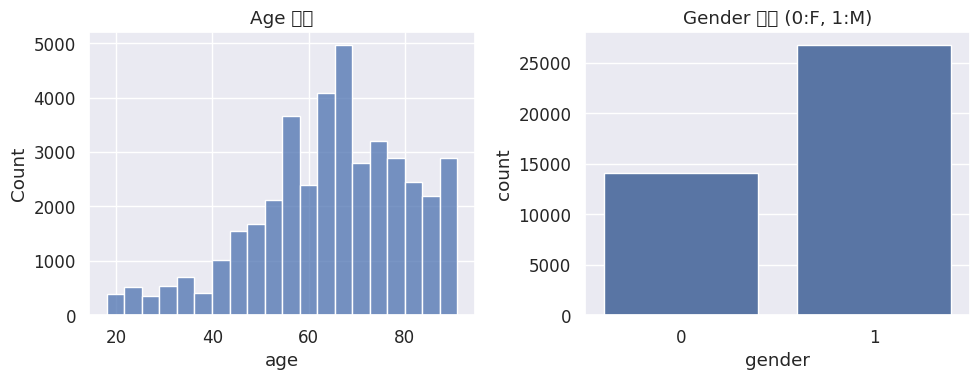

/tmp/ipython-input-3479659470.py:17: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3479659470.py:17: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3479659470.py:17: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3479659470.py:17: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3479659470.py:17: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3479659470.py:17: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) D

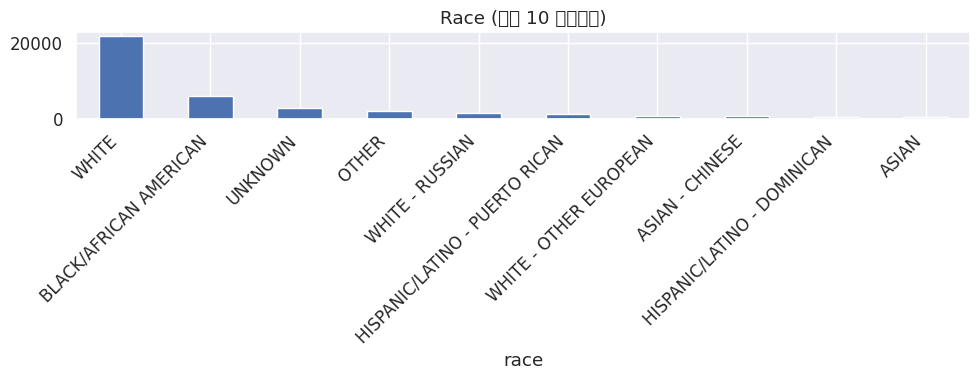

/tmp/ipython-input-3479659470.py:25: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3479659470.py:25: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3479659470.py:25: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3479659470.py:25: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-pa

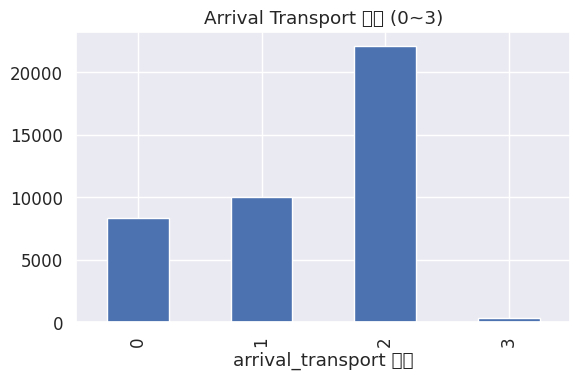

In [4]:
# 셀 4: 기본 인구통계 변수 시각화

fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.histplot(df["age"], bins=20, ax=axes[0])
axes[0].set_title("Age 분포")

sns.countplot(x="gender", data=df, ax=axes[1])
axes[1].set_title("Gender 분포 (0:F, 1:M)")
plt.tight_layout()
plt.show()

# race는 raw string이니까 top 10만
plt.figure(figsize=(10,4))
df["race"].value_counts().head(10).plot(kind="bar")
plt.title("Race (상위 10 카테고리)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# arrival_transport 분포
plt.figure(figsize=(6,4))
df["arrival_transport"].value_counts().sort_index().plot(kind="bar")
plt.title("Arrival Transport 분포 (0~3)")
plt.xlabel("arrival_transport 코드")
plt.tight_layout()
plt.show()


=== delay 컬럼 기술통계 (전체, -1 포함) ===


,count,mean,std,min,25%,50%,75%,max
door_to_ecg,40817.0,9.885947,43.163946,-1.0,-1.0,-1.0,5.0,396.48
door_to_trop,40817.0,538.587063,714.328151,-1.0,42.0,417.0,659.0,4598.72
door_to_anti,40817.0,561.169799,572.312231,-1.0,235.0,435.0,709.0,3477.32
door_to_pci,40817.0,534.901097,1495.754551,-1.0,-1.0,-1.0,276.0,8006.76



=== missing flag 분포 ===

[door_to_ecg_missing_flag]
door_to_ecg_missing_flag
1    29382
0    11435
Name: count, dtype: int64
 → missing(1) 비율: 0.720

[door_to_trop_missing_flag]
door_to_trop_missing_flag
0    32469
1     8348
Name: count, dtype: int64
 → missing(1) 비율: 0.205

[door_to_anti_missing_flag]
door_to_anti_missing_flag
0    35750
1     5067
Name: count, dtype: int64
 → missing(1) 비율: 0.124

[door_to_pci_missing_flag]
door_to_pci_missing_flag
1    22832
0    17985
Name: count, dtype: int64
 → missing(1) 비율: 0.559


/tmp/ipython-input-2487573508.py:24: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2487573508.py:24: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


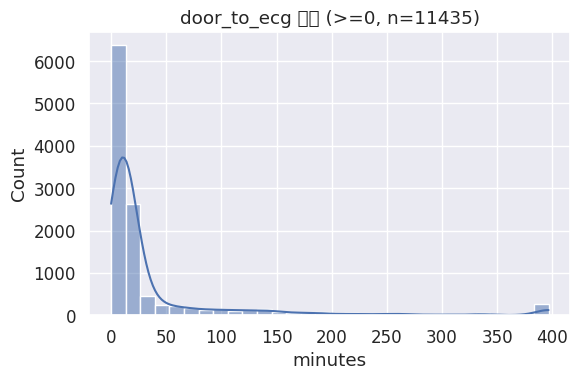

/tmp/ipython-input-2487573508.py:24: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2487573508.py:24: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


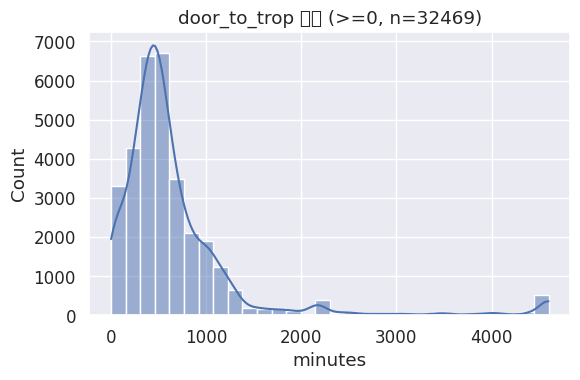

/tmp/ipython-input-2487573508.py:24: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2487573508.py:24: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


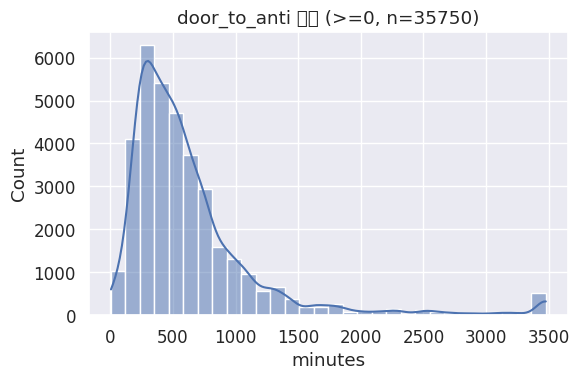

/tmp/ipython-input-2487573508.py:24: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2487573508.py:24: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


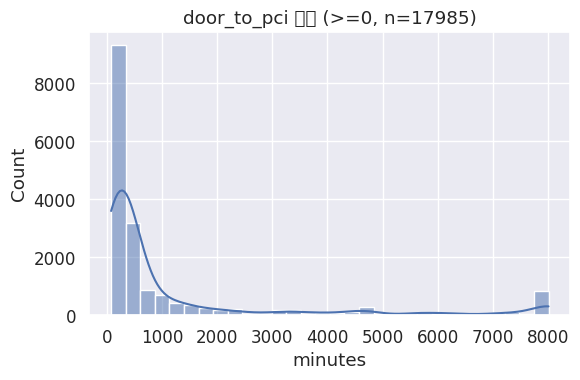

In [5]:
# 셀 5: door_to_@@ 및 missing flag EDA

delay_cols = ["door_to_ecg", "door_to_trop", "door_to_anti", "door_to_pci"]
delay_miss_cols = [c + "_missing_flag" for c in delay_cols]

print("=== delay 컬럼 기술통계 (전체, -1 포함) ===")
display(df[delay_cols].describe().T)

print("\n=== missing flag 분포 ===")
for col in delay_miss_cols:
    if col in df.columns:
        print(f"\n[{col}]")
        vc = df[col].value_counts()
        print(vc)
        print(f" → missing(1) 비율: {vc.get(1,0) / vc.sum():.3f}")

# -1 제외하고 유효값만 분포 확인 (발표용 히스토그램)
for col in delay_cols:
    valid = df[df[col] >= 0][col]
    plt.figure(figsize=(6,4))
    sns.histplot(valid, bins=30, kde=True)
    plt.title(f"{col} 분포 (>=0, n={len(valid)})")
    plt.xlabel("minutes")
    plt.tight_layout()
    plt.show()


/tmp/ipython-input-2816300731.py:7: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2816300731.py:7: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


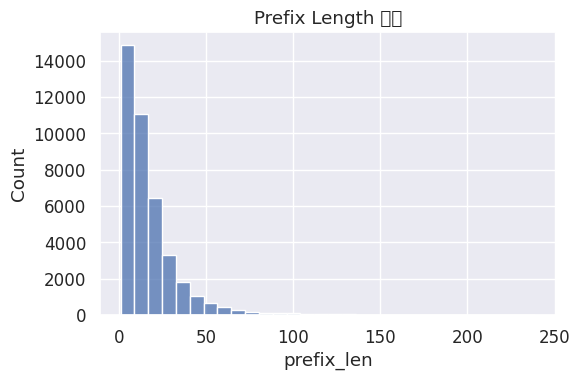

,prefix_len
count,40817.000000
mean,17.644070
std,20.778461
min,1.000000
25%,6.000000
50%,12.000000
75%,22.000000
max,239.000000


/tmp/ipython-input-2816300731.py:16: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2816300731.py:16: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2816300731.py:16: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2816300731.py:16: UserWarning: Glyph 48292 (\N{HANGUL SYLLABLE BEN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2816300731.py:16: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2816300731.py:16: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2816300731.py:16: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


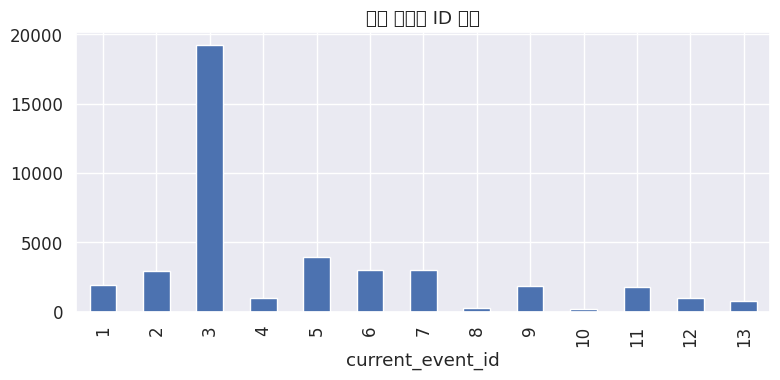

/tmp/ipython-input-2816300731.py:25: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2816300731.py:25: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


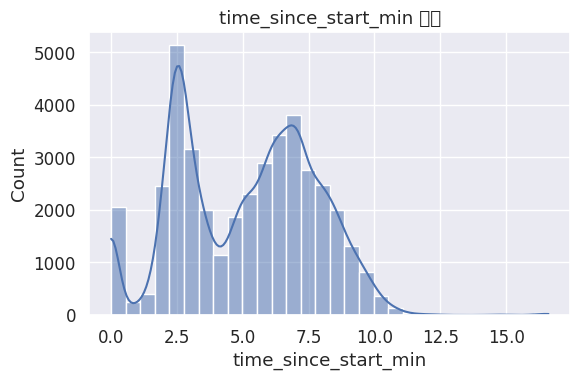

,time_since_start_min
count,40817.000000
mean,5.136388
std,2.624046
min,0.000000
25%,2.708050
50%,5.433722
75%,7.160846
max,16.609066


/tmp/ipython-input-2816300731.py:25: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2816300731.py:25: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


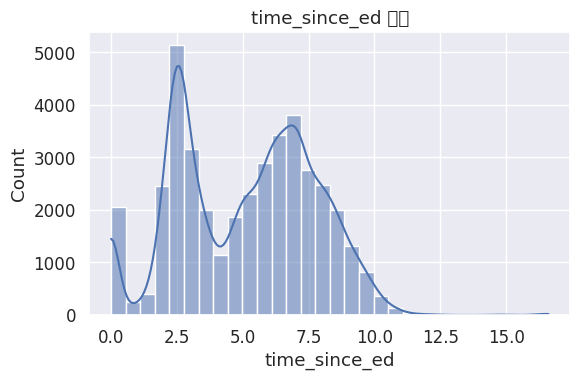

,time_since_ed
count,40817.000000
mean,5.136388
std,2.624046
min,0.000000
25%,2.708050
50%,5.433722
75%,7.160846
max,16.609066


/tmp/ipython-input-2816300731.py:25: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2816300731.py:25: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


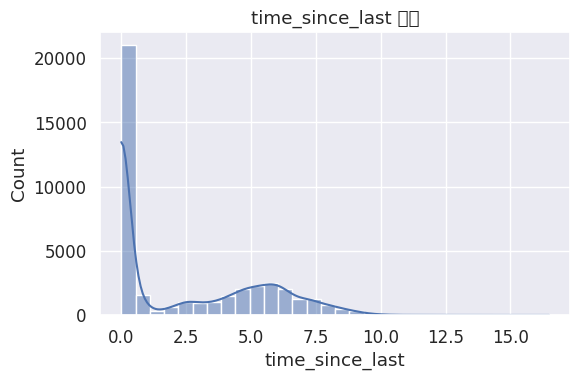

,time_since_last
count,40817.000000
mean,2.407908
std,2.883457
min,0.000000
25%,0.000000
50%,0.000000
75%,5.130490
max,16.488333


In [6]:
# 셀 6: prefix_len, current_event_id, time 관련 변수

# prefix_len 분포
plt.figure(figsize=(6,4))
sns.histplot(df["prefix_len"], bins=30)
plt.title("Prefix Length 분포")
plt.tight_layout()
plt.show()
display(df["prefix_len"].describe())

# current_event_id 빈도
plt.figure(figsize=(8,4))
df["current_event_id"].value_counts().sort_index().plot(kind="bar")
plt.title("현재 이벤트 ID 분포")
plt.xlabel("current_event_id")
plt.tight_layout()
plt.show()

# time_since_start_min, time_since_ed, time_since_last
time_cols = ["time_since_start_min", "time_since_ed", "time_since_last"]
for col in time_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"{col} 분포")
    plt.tight_layout()
    plt.show()
    display(df[col].describe())


/tmp/ipython-input-909029515.py:8: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-909029515.py:8: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


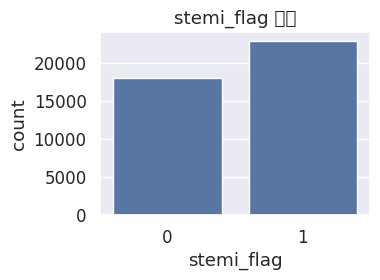

/tmp/ipython-input-909029515.py:8: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-909029515.py:8: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)



[stemi_flag] value counts
stemi_flag
1    22870
0    17947
Name: count, dtype: int64


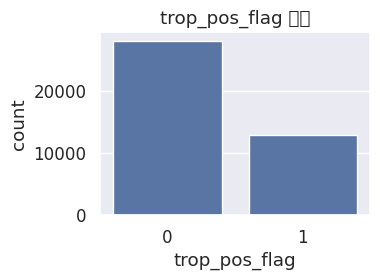


[trop_pos_flag] value counts
trop_pos_flag
0    28018
1    12799
Name: count, dtype: int64


/tmp/ipython-input-909029515.py:18: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-909029515.py:18: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


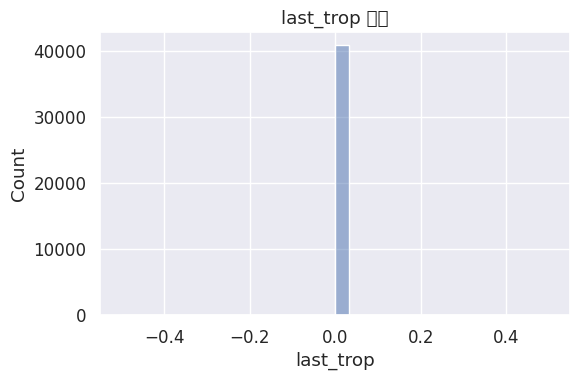

,last_trop
count,40817.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


/tmp/ipython-input-909029515.py:18: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-909029515.py:18: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


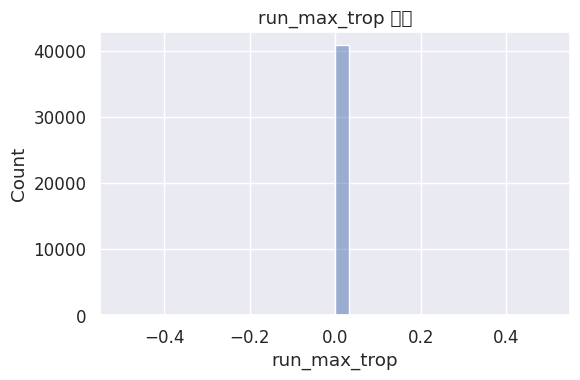

,run_max_trop
count,40817.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [7]:
# 셀 7: Troponin / STEMI 관련 상태 피처

flag_cols = ["stemi_flag", "trop_pos_flag"]
for col in flag_cols:
    plt.figure(figsize=(4,3))
    sns.countplot(x=col, data=df)
    plt.title(f"{col} 분포")
    plt.tight_layout()
    plt.show()
    print(f"\n[{col}] value counts")
    print(df[col].value_counts())

# last_trop / run_max_trop 분포
for col in ["last_trop", "run_max_trop"]:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"{col} 분포")
    plt.tight_layout()
    plt.show()
    display(df[col].describe())


/tmp/ipython-input-2504550243.py:6: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2504550243.py:6: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2504550243.py:6: UserWarning: Glyph 50630 (\N{HANGUL SYLLABLE EOBS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2504550243.py:6: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2504550243.py:6: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2504550243.py:6: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2504550243.py:6: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tm

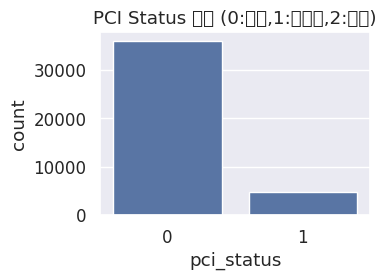

pci_status
0    36034
1     4783
Name: count, dtype: int64


/tmp/ipython-input-2504550243.py:14: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2504550243.py:14: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


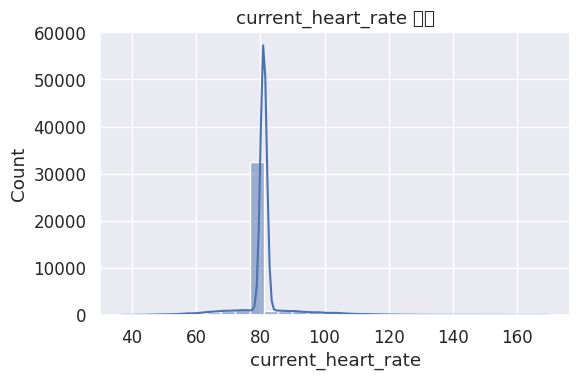

,current_heart_rate
count,40817.000000
mean,81.394596
std,8.194723
min,36.600000
25%,81.000000
50%,81.000000
75%,81.000000
max,170.000000


/tmp/ipython-input-2504550243.py:14: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2504550243.py:14: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


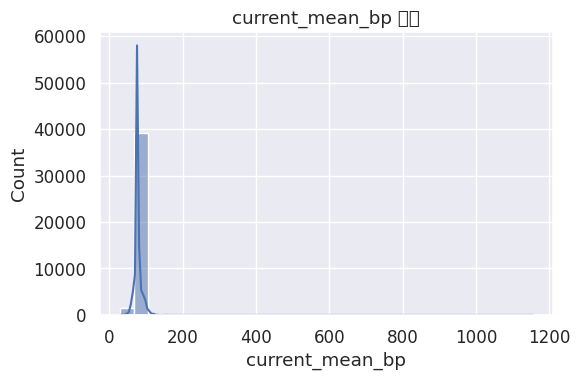

,current_mean_bp
count,40817.000000
mean,77.870043
std,9.495387
min,30.000000
25%,77.555556
50%,77.555556
75%,77.555556
max,1153.810811


In [8]:
# 셀 8: 시술 상태 + 생체징후

plt.figure(figsize=(4,3))
sns.countplot(x="pci_status", data=df)
plt.title("PCI Status 분포 (0:없음,1:진행중,2:종료)")
plt.tight_layout()
plt.show()
print(df["pci_status"].value_counts())

for col in ["current_heart_rate", "current_mean_bp"]:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"{col} 분포")
    plt.tight_layout()
    plt.show()
    display(df[col].describe())


/tmp/ipython-input-2741694957.py:7: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2741694957.py:7: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


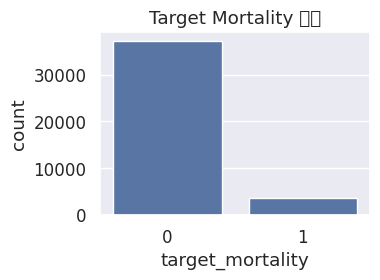

target_mortality
0    37238
1     3579
Name: count, dtype: int64


/tmp/ipython-input-2741694957.py:15: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2741694957.py:15: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


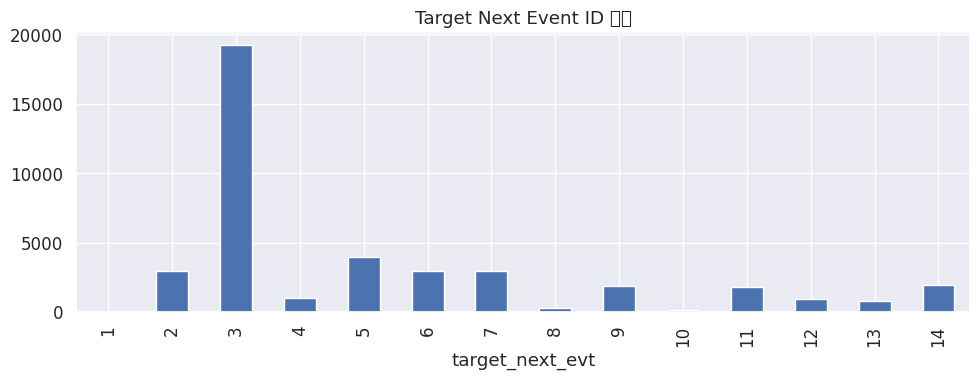

/tmp/ipython-input-2741694957.py:22: UserWarning: Glyph 52628 (\N{HANGUL SYLLABLE CU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2741694957.py:22: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2741694957.py:22: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2741694957.py:22: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52628 (\N{HANGUL SYLLABLE CU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dis

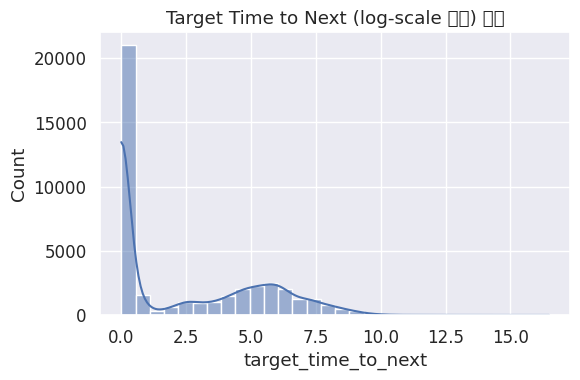

,target_time_to_next
count,40817.000000
mean,2.407908
std,2.883457
min,0.000000
25%,0.000000
50%,0.000000
75%,5.130490
max,16.488333


/tmp/ipython-input-2741694957.py:30: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2741694957.py:30: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2741694957.py:30: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_f

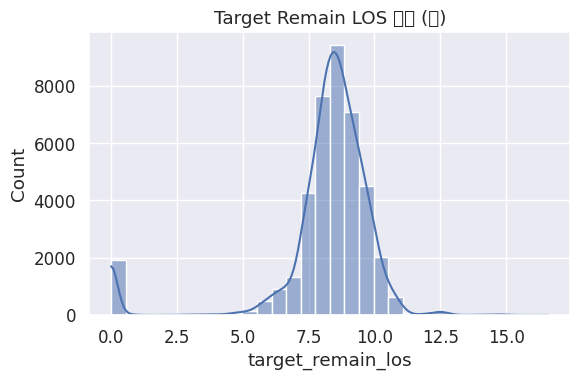

,target_remain_los
count,40817.000000
mean,8.144641
std,2.094335
min,0.000000
25%,7.855932
50%,8.475538
75%,9.189525
max,16.609066


In [9]:
# 셀 9: 타깃 변수 EDA

# 1) 사망 여부
plt.figure(figsize=(4,3))
sns.countplot(x="target_mortality", data=df)
plt.title("Target Mortality 분포")
plt.tight_layout()
plt.show()
print(df["target_mortality"].value_counts())

# 2) 다음 이벤트 ID
plt.figure(figsize=(10,4))
df["target_next_evt"].value_counts().sort_index().plot(kind="bar")
plt.title("Target Next Event ID 분포")
plt.tight_layout()
plt.show()

# 3) 다음 이벤트까지 시간 (log 변환된 것 같으니 분포만 확인)
plt.figure(figsize=(6,4))
sns.histplot(df["target_time_to_next"], bins=30, kde=True)
plt.title("Target Time to Next (log-scale 추정) 분포")
plt.tight_layout()
plt.show()
display(df["target_time_to_next"].describe())

# 4) 남은 LOS
plt.figure(figsize=(6,4))
sns.histplot(df["target_remain_los"], bins=30, kde=True)
plt.title("Target Remain LOS 분포 (일)")
plt.tight_layout()
plt.show()
display(df["target_remain_los"].describe())


/tmp/ipython-input-1624529297.py:22: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1624529297.py:22: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1624529297.py:22: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1624529297.py:22: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1624529297.py:22: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1624529297.py:22: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1624529297.py:22: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout(

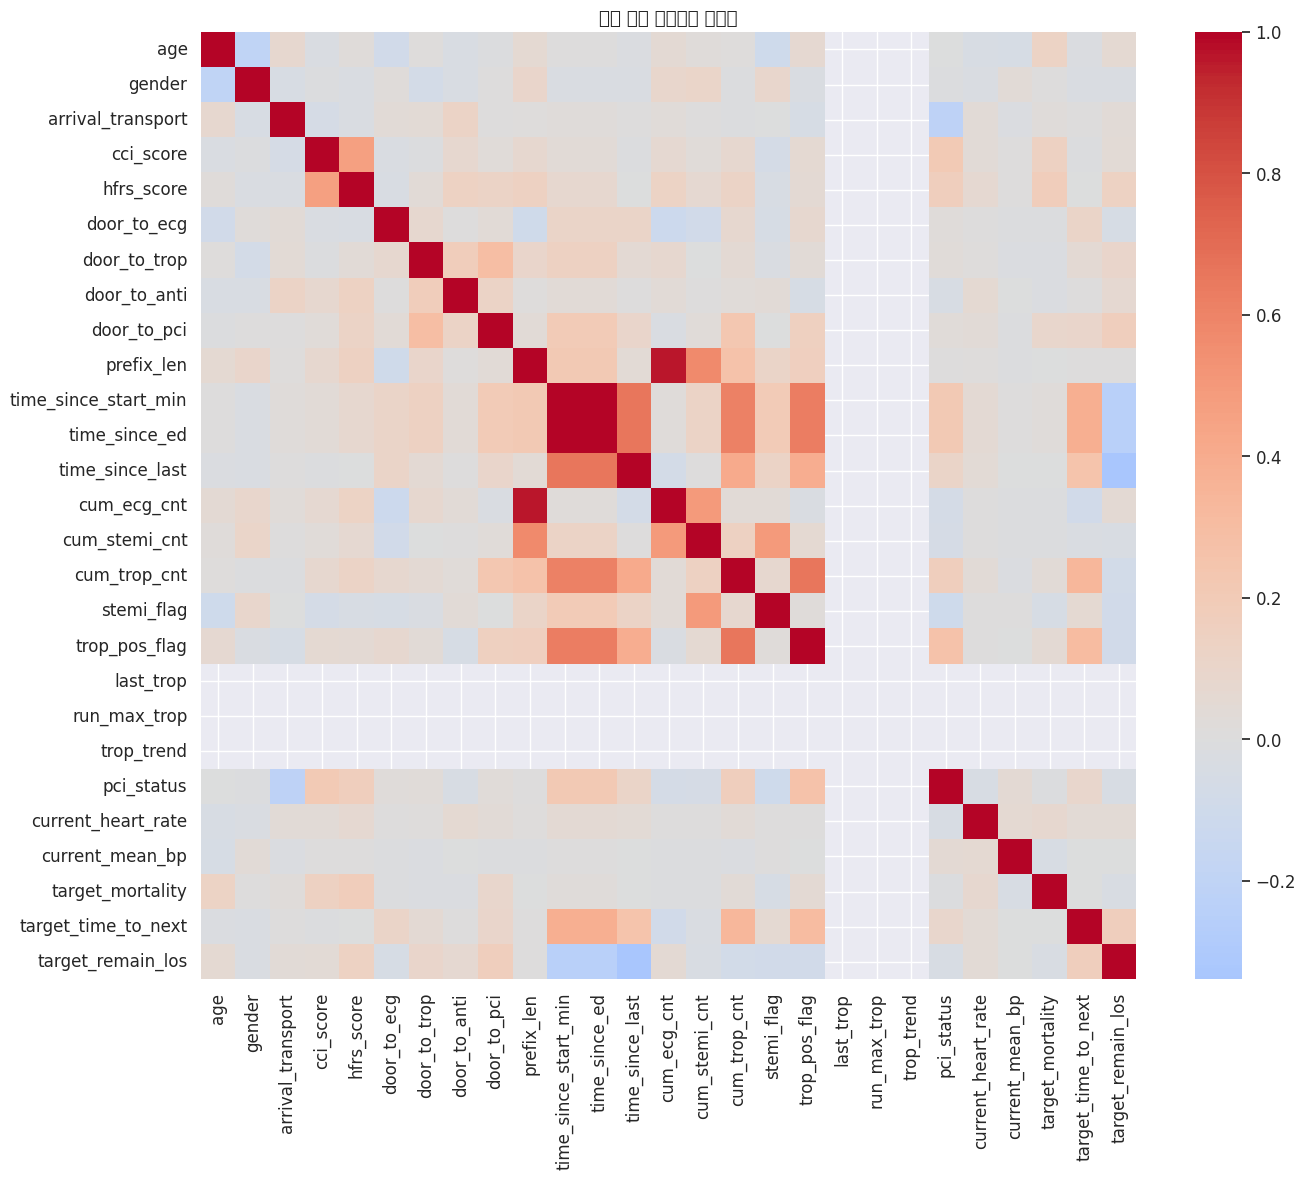

In [10]:
# 셀 10: 주요 숫자형 피처 상관관계 히트맵

# 너무 많으면 복잡하니 핵심 feature만 선택
core_cols = [
    "age", "gender", "arrival_transport",
    "cci_score", "hfrs_score",
    "door_to_ecg", "door_to_trop", "door_to_anti", "door_to_pci",
    "prefix_len", "time_since_start_min", "time_since_ed", "time_since_last",
    "cum_ecg_cnt", "cum_stemi_cnt", "cum_trop_cnt",
    "stemi_flag", "trop_pos_flag",
    "last_trop", "run_max_trop", "trop_trend",
    "pci_status", "current_heart_rate", "current_mean_bp",
    "target_mortality", "target_time_to_next", "target_remain_los"
]

sub = df[core_cols]

plt.figure(figsize=(14,12))
corr = sub.corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("주요 변수 상관관계 히트맵")
plt.tight_layout()
plt.show()
